### Importing the Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("../../Bigdata Files/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600000,0.627000,50,1
1,1,85,66,29,0,26.600000,0.351000,31,0
2,8,183,64,0,0,23.300000,0.672000,32,1
3,1,89,66,23,94,28.100000,0.167000,21,0
4,0,137,40,35,168,43.100000,2.288000,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.900000,0.171000,63,0
764,2,122,70,27,0,36.800000,0.340000,27,0
765,5,121,72,23,112,26.200000,0.245000,30,0
766,1,126,60,0,0,30.100000,0.349000,47,1
767,1,93,70,31,0,30.400000,0.315000,23,0


# Data Preprocessing

In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Separate  X & y

In [12]:
X=df.drop("Outcome",axis=1).values

In [13]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [14]:
y=df["Outcome"].values

# Converting data into train & test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Normalize data 

**StandardScaler** used for normalize values

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
print(X_test)

[[ 0.69748316 -0.70719864 -0.64639893 ...  0.26575953 -0.11680393
   0.85019217]
 [-0.52953881 -0.27388818  0.29399563 ...  0.488933   -0.94192338
  -1.03426754]
 [-0.52953881 -0.39769117 -0.31449497 ... -0.1543317  -0.91266382
  -1.03426754]
 ...
 [-1.14304979  0.19037303  0.57058226 ...  0.56770011  0.97750343
  -0.86295302]
 [ 0.69748316 -0.49054341  0.01740899 ... -0.1543317  -1.01799822
   0.33624861]
 [ 0.39072767 -1.35716433  0.68121692 ...  0.50206085 -0.91851573
   0.16493409]]


In [18]:
print(X_train)

[[-0.8362943  -0.80005088 -0.53576428 ... -1.06015343 -0.61421636
  -0.94861028]
 [ 0.39072767 -0.49054341  0.12804365 ...  0.64646721 -0.90973787
  -0.43466673]
 [-1.14304979  0.43797901 -0.09322566 ...  1.35537117 -0.30699103
  -0.77729576]
 ...
 [ 1.92450513 -0.6143464   0.90248622 ...  1.78859026  1.94892066
   0.42190587]
 [-1.14304979  0.62368349 -3.8548039  ...  1.36849903 -0.77514391
  -0.34900947]
 [-1.14304979  0.12847154  1.45565949 ... -1.24394334 -0.60836445
  -1.03426754]]


# Model Creation & Prediction

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(y_pred)

[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 0 0 0 0]


<Axes: >

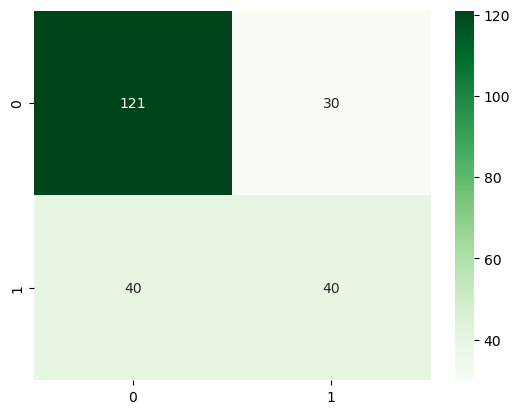

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
result = confusion_matrix(y_test,y_pred)
print(result)

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       151
           1       0.57      0.50      0.53        80

    accuracy                           0.70       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231

